In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
venezuela_tweets = pd.read_csv('/Users/alessandro/Downloads/venezuela_201906_1_tweets_csv_hashed.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_time = pd.DataFrame(pd.to_datetime( venezuela_tweets["tweet_time"] ))
df_time

,tweet_time
0,2017-03-13 13:27:00
1,2017-11-21 20:11:00
2,2018-07-20 18:22:00
3,2017-11-07 11:36:00
4,2017-03-24 13:37:00
5,2016-12-19 17:36:00
6,2016-11-14 16:26:00
7,2017-02-12 22:14:00
8,2016-10-21 23:40:00
9,2016-11-12 23:53:00


In [4]:
df_time["count"] = 1
df_time.set_index("tweet_time", inplace = True)
df_time.head()

,count
tweet_time,
2017-03-13 13:27:00,1
2017-11-21 20:11:00,1
2018-07-20 18:22:00,1
2017-11-07 11:36:00,1
2017-03-24 13:37:00,1


In [5]:
df_time['year'] = df_time.index.year
df_time['month'] = df_time.index.month
df_time['dayofweek'] = df_time.index.day_name()


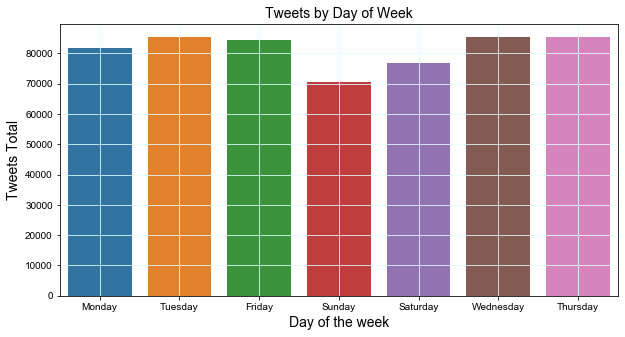

In [6]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='dayofweek', data=df_time)
sns.set(style='darkgrid')

plt.ylabel('Tweets Total', fontsize = 14)
plt.xlabel('Day of the week', fontsize = 14)
plt.title('Tweets by Day of Week', fontsize = 14)
plt.grid(c = 'lightcyan')

        
plt.show ()

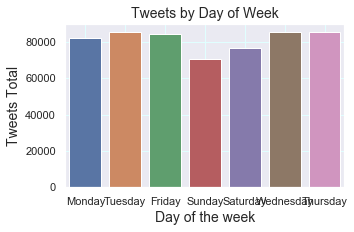

In [7]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='dayofweek', data=df_time)
sns.set(style='darkgrid')

plt.ylabel('Tweets Total', fontsize = 14)
plt.xlabel('Day of the week', fontsize = 14)
plt.title('Tweets by Day of Week', fontsize = 14)
plt.grid(c = 'lightcyan')

        
plt.show ()

In [8]:
# hourly
hourly = df_time['count'].resample('H').sum()

# daily
daily = df_time.resample('D').sum()

# monthly
monthly = df_time['count'].resample('M').sum()

# weekly
weekly = df_time.resample('W').sum()

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


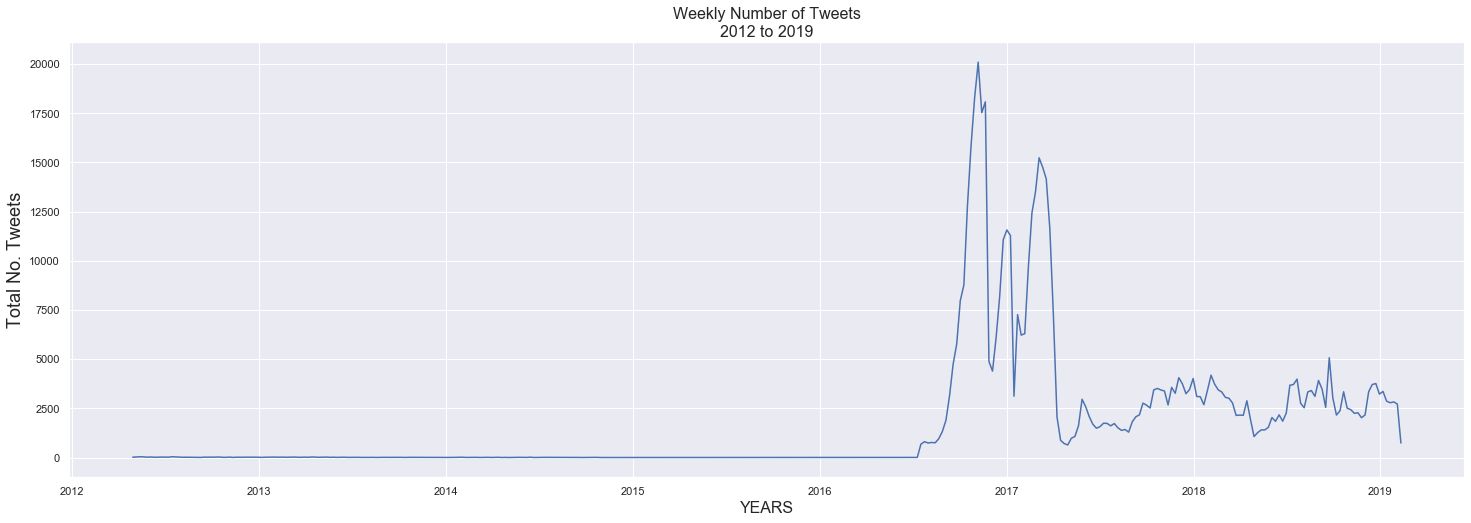

In [9]:
plt.figure(figsize=(25,8))
plt.plot(weekly['count'])
plt.xlabel('YEARS', fontsize = 16)
plt.ylabel('Total No. Tweets', fontsize = 18)
plt.title('Weekly Number of Tweets\n2012 to 2019', fontsize = 16);

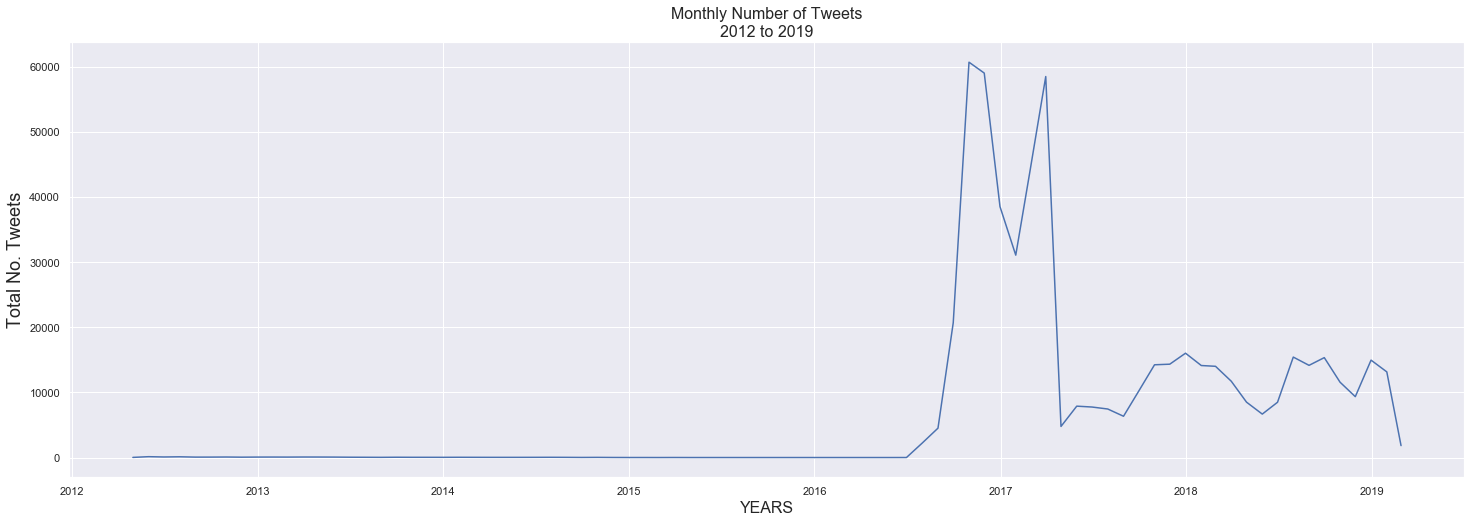

In [11]:
plt.figure(figsize=(25,8))
plt.plot(monthly)
plt.xlabel('YEARS', fontsize = 16)
plt.ylabel('Total No. Tweets', fontsize = 18)
plt.title('Monthly Number of Tweets\n2012 to 2019', fontsize = 16);

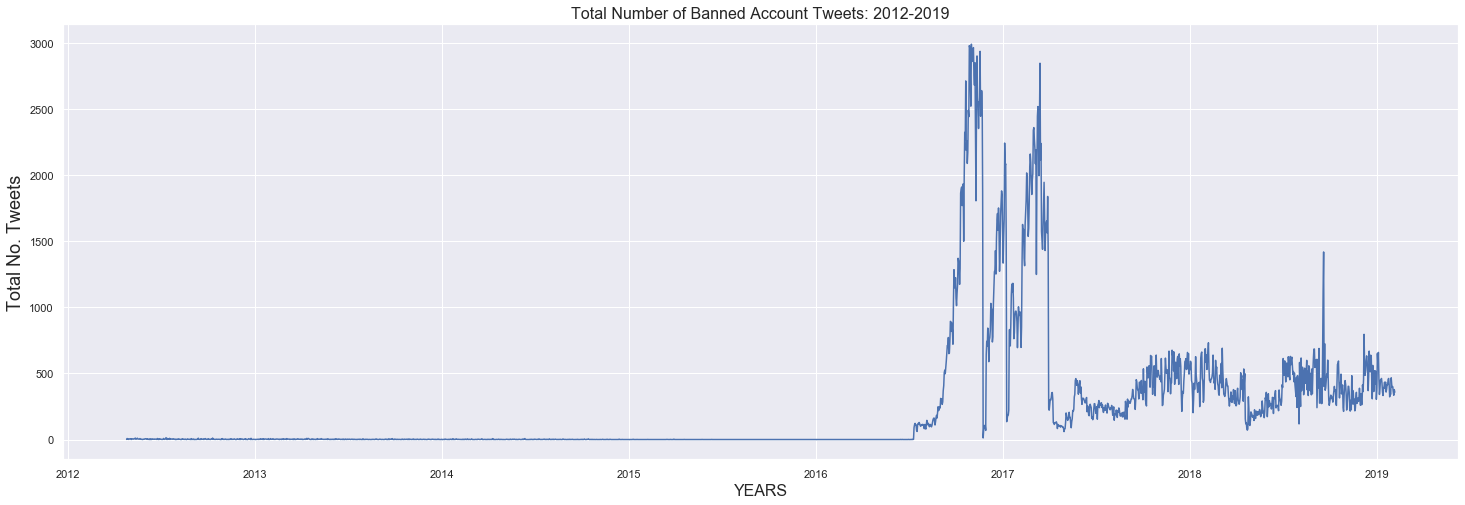

In [12]:


plt.figure(figsize=(25,8))
plt.plot(daily['count'])
plt.xlabel('YEARS', fontsize =16)
plt.ylabel('Total No. Tweets', fontsize = 18)
plt.title('Total Number of Banned Account Tweets: 2012-2019', fontsize =16);


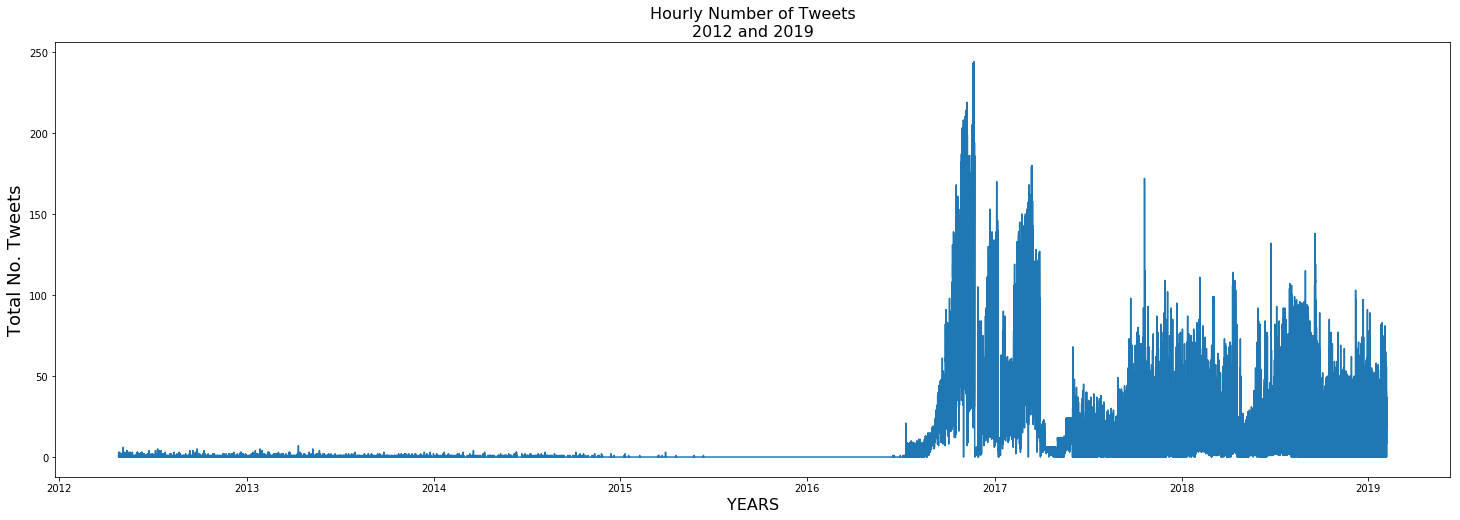

In [11]:

plt.figure(figsize=(25,8))
plt.plot(hourly)
plt.xlabel('YEARS', fontsize = 16)
plt.ylabel('Total No. Tweets', fontsize = 18)
plt.title('Hourly Number of Tweets\n2012 and 2019', fontsize = 16);

In [23]:
# data['tweet_time'] = pd.to_datetime(data['tweet_time'])
start_date2016 = '2016-06-01'
end_date2017 = '2017-06-01'

mask2016 = (venezuela_tweets['tweet_time'] > start_date2016) & (venezuela_tweets['tweet_time'] <= end_date2017)

data_2016 = venezuela_tweets.loc[mask2016]

In [24]:
tweets_mask2016 = data_2016['is_retweet'] == False
tweets2016 = data_2016[tweets_mask2016]
# tweets_english2016 = tweets2016[ tweets2016['account_language'] == 'en']
# tweets_english2016

# tweets_mask2015 = data_2015['is_retweet'] == False
# tweets2015 = data_2015[tweets_mask2015]
# tweets_english2015 = tweets2015[ tweets2015['account_language'] == 'en']


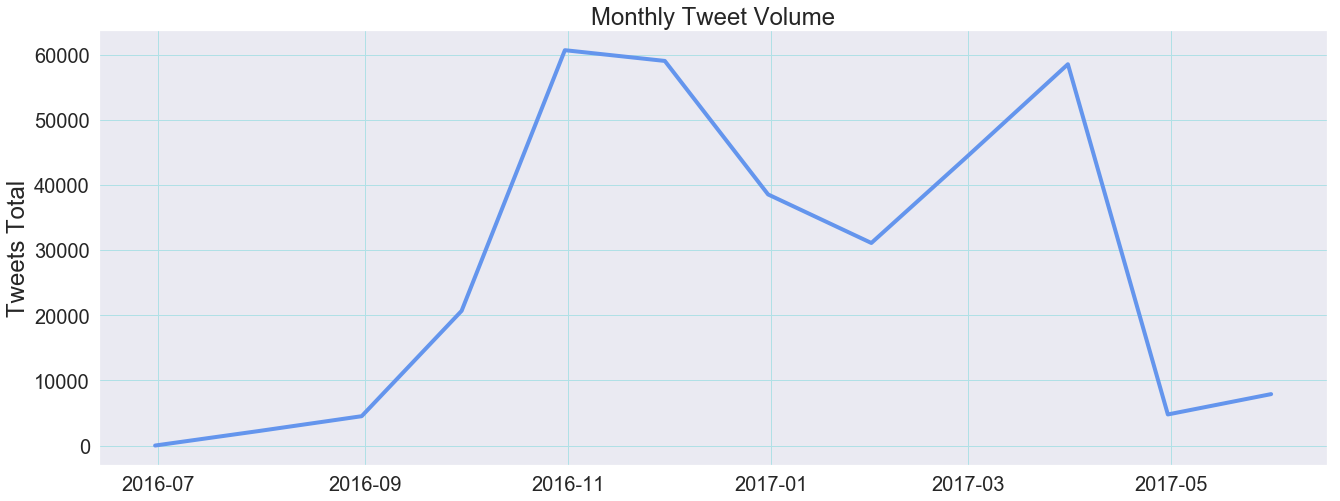

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Number of Tweets Over Time
df_time2016 = pd.DataFrame(pd.to_datetime( tweets2016["tweet_time"] ))

df_time2016["count"] = 1
df_time2016.set_index("tweet_time", inplace = True)

# monthly
monthly2016 = df_time2016['count'].resample('M').sum()



plt.figure(figsize=(22,8))

plt.plot(monthly2016,  c = 'cornflowerblue', linewidth=4.0)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Tweets Total', fontsize = 24)
plt.title('Monthly Tweet Volume', fontsize = 24)
plt.grid(c = 'powderblue')

plt.show()

# plt.savefig('plots/monthly_tweet_volume2015.png')

In [26]:
start_date2017 = '2017-09-01'

end_date2019 = '2019-04-01'

mask2018 = (venezuela_tweets['tweet_time'] > start_date2017) & (venezuela_tweets['tweet_time'] <= end_date2019)

data_2018 = venezuela_tweets.loc[mask2018]



In [27]:
tweets_mask2018 = data_2018['is_retweet'] == False
tweets2018 = data_2018[tweets_mask2018]

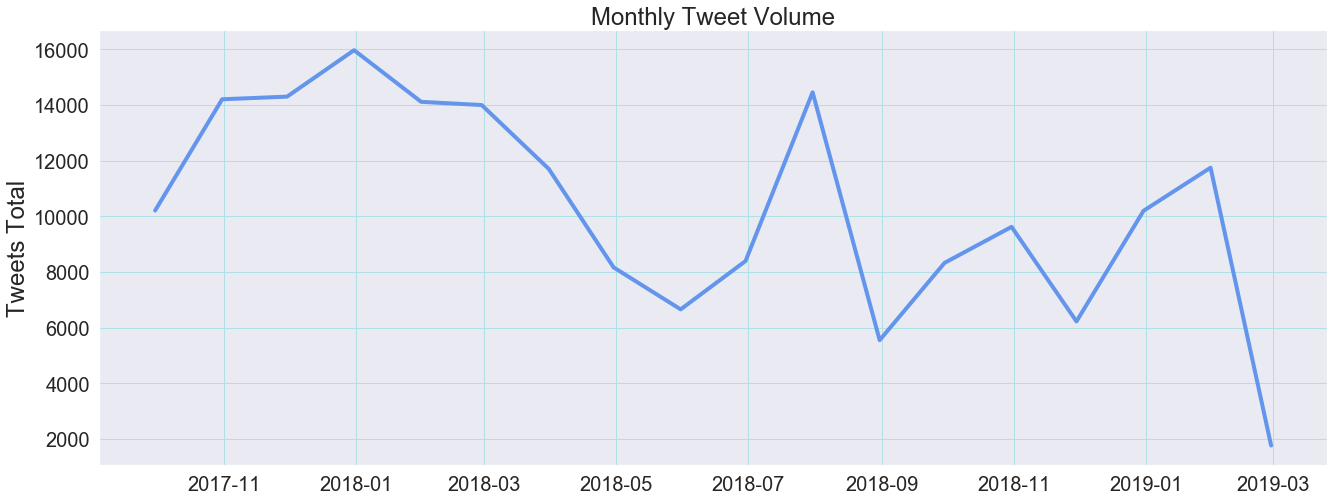

In [28]:
# Number of Tweets Over Time
df_time2018 = pd.DataFrame(pd.to_datetime( tweets2018["tweet_time"] ))

df_time2018["count"] = 1
df_time2018.set_index("tweet_time", inplace = True)

# monthly
monthly2018 = df_time2018['count'].resample('M').sum()



plt.figure(figsize=(22,8))

plt.plot(monthly2018,  c = 'cornflowerblue', linewidth=4.0)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Tweets Total', fontsize = 24)
plt.title('Monthly Tweet Volume', fontsize = 24)
plt.grid(c = 'powderblue')

plt.show()